Best var_smoothing: 1.0e-09

Test Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Correct Predictions (29):
  Sample 0: True = setosa, Pred = setosa
  Sample 1: True = virginica, Pred = virginica
  Sample 2: True = versicolor, Pred = versicolor
  Sample 3: True = versicolor, Pred = versicolor
  Sample 4: True = setosa, Pred = setosa
  Sample 5: True = versicolor, Pred = versicolor
  Sample 6: True = setosa, Pred = setosa
  Sample 7: True = setosa, Pred = setosa
  Sample 8: True = virginica, Pred = virginica
  Sample 9: True = versicolor, Pred = versicolor
  Sample

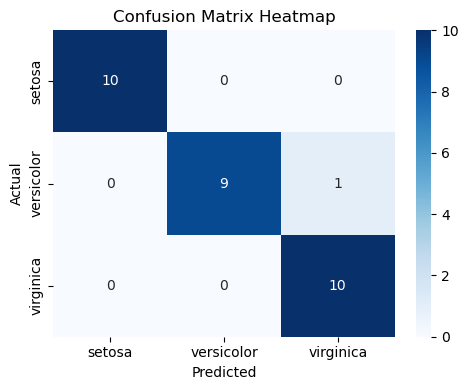

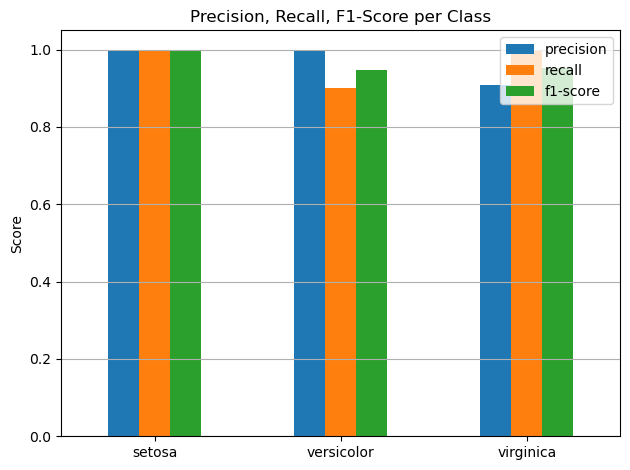

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Export iris dataset to CSV and read it back
iris = load_iris(as_frame=True)
df = iris.frame.rename(columns={'target': 'Species'})
df.to_csv('iris.csv', index=False)
df = pd.read_csv('iris.csv')

# Step 2: Split dataset
X = df.drop('Species', axis=1).values
y = df['Species'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Standard scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {'var_smoothing': np.logspace(-9, -6, 10)}
grid = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)
best_gnb = grid.best_estimator_
print(f"Best var_smoothing: {grid.best_params_['var_smoothing']:.1e}")

# Step 5: Prediction and evaluation
y_pred = best_gnb.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 6: Correct vs Wrong predictions
correct = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
wrong   = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
print(f"\nCorrect Predictions ({len(correct)}):")
for i in correct:
    print(f"  Sample {i}: True = {iris.target_names[y_test[i]]}, Pred = {iris.target_names[y_pred[i]]}")

print(f"\nWrong Predictions ({len(wrong)}):")
for i in wrong:
    print(f"  Sample {i}: True = {iris.target_names[y_test[i]]}, Pred = {iris.target_names[y_pred[i]]}")

# Step 7: Visualizations
# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

# Classification report bar chart
report = classification_report(
    y_test, y_pred, target_names=iris.target_names, output_dict=True
)
metrics_df = pd.DataFrame(report).T.iloc[:-3, :3]
metrics_df.plot.bar(rot=0)
plt.title('Precision, Recall, F1-Score per Class')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
